# `Supervised Learning Classification Framework`

# `e.g. Finding high opportunity customer segment using census data`  

----
# 0. Background 

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. 

You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. 

Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000.

This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). 

----
# 1. Problem Set-up

#### 1.1 Import essential libraries  


In [305]:
import numpy as np
import pandas as pd
from time import time
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import sklearn 

import matplotlib.pyplot as pl 
import matplotlib.patches as mpatches

%matplotlib inline

# Enable display() for pandas DataFrames
from IPython.display import display 

#### 1.2 Import Data 

In [272]:
data = pd.read_csv('census_income.csv')
display(data.head(n=10))

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,36584
1,1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,42718
2,2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,36709
3,3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,31099
4,4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,26754
5,5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,27872
6,6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,42740
7,7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,87888
8,8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,58273
9,9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,206879


#### 1.3 Create segment label

In [273]:
income_flag = []

for ii, income in enumerate(data['income']):
    if income > 80000:
        income_flag.append('>80K')
    if income <=80000:
         income_flag.append('<=80K')

data['income_flag'] = income_flag

display(data.head(n=10))

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_flag
0,0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,36584,<=80K
1,1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,42718,<=80K
2,2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,36709,<=80K
3,3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,31099,<=80K
4,4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,26754,<=80K
5,5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,27872,<=80K
6,6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,42740,<=80K
7,7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,87888,>80K
8,8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,58273,<=80K
9,9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,206879,>80K


In [274]:
# Total number of records
n_records = data.shape[0]

# Number of records per segment 
n_affluent = data.loc[data['income_flag']=='>80K'].shape[0]

# Print the results
print("# of total number of individuals: {}".format(n_records))
print("% of individuals in the affluent income class: {}%".format(round(n_affluent/n_records * 100)))

# of total number of individuals: 45222
% of individuals in the affluent income class: 22%


#### 1.5 Define features and label

In [275]:
# Split the data into features and target label
label_raw = data['income_flag']
features_raw = data.drop(['income', 'income_flag', 'Unnamed: 0'], axis = 1)

#### 1.4 Feature exploration 

In [276]:
numerical = []
categorical = []

for column in features_raw.columns: 
    print(column)
    if type(data[column][0])== type('str'):
        categorical.append(column)
        print(data[column].unique())
    else:
        numerical.append(column)
        print(data[column].min(), '-', data[column].max())

age
17 - 90
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education_level
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
education-num
1.0 - 16.0
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex
[' Male' ' Female']
capital-gain
0.0 - 99999.0
capital-loss
0.0 -

----
# 2. Data Preprocessing  


#### 2.1 Log transforming skewed continuous features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. 

Apply a logarithmic transformation on the highly-skewed feature distributions to reduce the range of values caused by outliers. Note, care must be taken when applying this transformation however: The logarithm of `0` is undefined, hence use `.apply(lambda x: np.log(x+1))` 

In our sample census dataset '`capital-gain'` and `'capital-loss'` features fit this description

In [277]:
def vs_distribution(data, subset, title):
    
    """
    Visualization for displaying distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(subset):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        # ax.set_ylim((0, 2000))
        #ax.set_yticks([0, 500, 1000, 1500, 2000])
        #ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

        fig.suptitle(title + " Distributions of Continuous Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

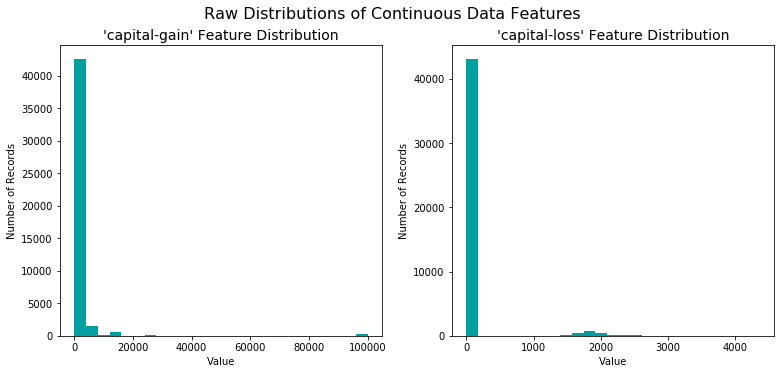

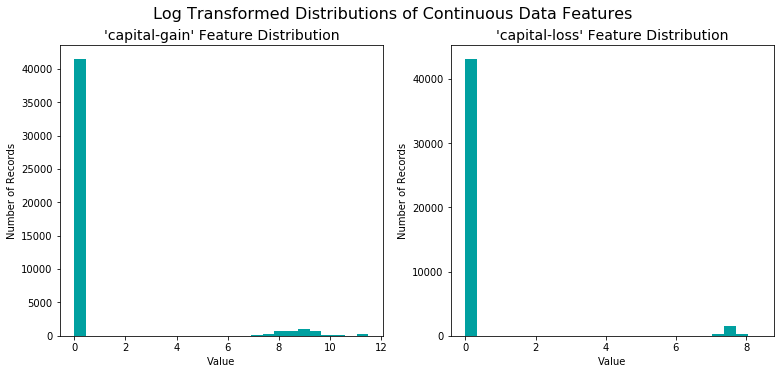

In [281]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']

features_transformed_log = features_raw.copy(deep=True)
features_transformed_log[skewed] = features_transformed_log[skewed].apply(lambda x: np.log(x + 1)) 

# Visualize the RAW and new LOG TRANFORMED feature distributions
vs_distribution(features_raw, skewed, title = "Raw")  
vs_distribution(features_transformed_log, skewed, title = "Log Transformed") 

#### 2.2 Normalizing Numerical Features

In [283]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0,1)

features_transformed_log_norm = features_transformed_log.copy(deep = True)
features_transformed_log_norm[numerical] = scaler.fit_transform(features_transformed_log_norm[numerical])

#### 2.3 Encoding categrorical features & label  

In [284]:
# One-hot encode the data using pandas.get_dummies()
features_final = pd.get_dummies(data = features_transformed_log_norm, columns = categorical, prefix=categorical)
#print(features_final.head(10))

# Encode the 'income_flag' data to numerical values
label_final = label_raw.map({label_raw.unique()[0]:0,(label_raw.unique()[1]):1})
#print(label_final.head(10))

# Print the number of features after one-hot encoding
print("{} total features after one-hot encoding.".format(len(list(features_final.columns))))

103 total features after one-hot encoding.


#### 2.4 Shuffle and split the data

In [285]:
#older version of the module
#from sklearn.cross_validation import train_test_split 

from sklearn.model_selection import train_test_split

# Split the 'features_final' and 'label_final' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    label_final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
# 4. Training and Testing Functions 

In [286]:
from sklearn.metrics import accuracy_score, f1_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
        
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' 
    
    start = time() # Get start time
    learner.fit(X=X_train[:sample_size],y= y_train[:sample_size])
    end = time() # Get end time
    
    #print("{} sec".format(round(end-start,3)))

    # Calculate the training time
    results['train_time'] = round(end-start,3)
        
    # Get the predictions on the test set (X_test) and training samples (X_train[:300]) 
    
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = round(end-start,3)
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_pred=predictions_train, y_true = y_train[:sample_size])

    # Compute accuracy on test set 
    results['acc_test'] = accuracy_score(y_pred=predictions_test, y_true = y_test).round(2)
    
    # Compute F1-score on the the first 300 training
    results['f_train'] = fbeta_score(beta=1, y_pred=predictions_train, y_true = y_train[:sample_size])
        
    # Compute F1-score on the test set 
    results['f_test'] = fbeta_score(beta=1, y_pred=predictions_test, y_true = y_test)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
     
    return results


----
# 5. Algorithm Selection

#### 5.1 Naive predictor -> assume all positive classification  

**Accuracy** `[Correct Predictions / Total Guesses]`

**Precision** `[True Positives / (True Positives + False Positives)]`

**Recall** `[True Positives / (True Positives + False Negatives)]`


**F-beta score** considers both precision and recall; when $\beta = 1$, **F$_{1}$ score** precision and recall are equally weighted 

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In [287]:
TP = np.sum(label_final) # Counting the ones as this is the naive case
FP = label_final.count() - TP 

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = TP/label_final.count()  
recall = TP/(TP+FN)
precision = TP/(TP+FP)

beta = 1
fscore = (1+beta**2)*(precision*recall/((beta**2)*precision+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2181, F-score: 0.3580]


#### 5.2 Initial evaluation

In [291]:
# Initialize supervised learning classifier algorithms
learners= []

from sklearn.linear_model import LogisticRegression
learners.append(LogisticRegression())

from sklearn.tree import DecisionTreeClassifier
learners.append(DecisionTreeClassifier())

from sklearn.neighbors import KNeighborsClassifier
learners.append(KNeighborsClassifier())

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
learners.append(GradientBoostingClassifier())
learners.append(AdaBoostClassifier())
learners.append(BaggingClassifier())
learners.append(RandomForestClassifier())

from sklearn.svm import LinearSVC, SVC
learners.append(SVC())
learners.append(LinearSVC())

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
learners.append(BernoulliNB())
learners.append(GaussianNB())
learners.append(MultinomialNB())

# Train and test each of the learner algorithms and collect results in a dictionary
results = {}
for clf in learners:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, int(len(y_train)/5), X_train, y_train, X_test, y_test)

LogisticRegression trained on 7235 samples.
DecisionTreeClassifier trained on 7235 samples.
KNeighborsClassifier trained on 7235 samples.
GradientBoostingClassifier trained on 7235 samples.
AdaBoostClassifier trained on 7235 samples.
BaggingClassifier trained on 7235 samples.
RandomForestClassifier trained on 7235 samples.
SVC trained on 7235 samples.
LinearSVC trained on 7235 samples.
BernoulliNB trained on 7235 samples.
GaussianNB trained on 7235 samples.
MultinomialNB trained on 7235 samples.


  

#### 5.3 Visualization of results for various supervised learners


In [294]:
def vs_evaluate_models(results, accuracy, f1):
    '''
    Inputs:
    - learners: a list of supervised learners
    - results: a list of dictionaries of the statistic results from 'train_predict()'
    - accuracy: The score for the naive predictor
    - f1: The score for the naive predictor
    '''
    
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (16,12))

    # Constants
    bar_width = 1
    font1 = 12
    font2 = 18
    font3 = 24
    
    learners =[]
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            
            #for i in np.arange(3):          
            # Create plot
            ax[j//3, j%3].bar(k*bar_width, results[learner][metric], width = bar_width)
            ax[j//3, j%3].set_xticks(list(range(0,12)))

            # add labels and rotate them 90 degrees
            ax[j//3, j%3].set_xticklabels(list(results.keys())[:k+1],fontsize = font1) 
            for tick in ax[j//3, j%3].get_xticklabels():
                tick.set_rotation(90)
            
            # add x axis label
            ax[j//3, j%3].set_xlabel("Algorithm", fontsize = font1)  
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (seconds)", fontsize = font1)
    ax[0, 1].set_ylabel("Accuracy Score", fontsize = font1)
    ax[0, 2].set_ylabel("F-score", fontsize = font1)
    ax[1, 0].set_ylabel("Time (seconds)", fontsize = font1)
    ax[1, 1].set_ylabel("Accuracy Score", fontsize = font1)
    ax[1, 2].set_ylabel("F-score", fontsize = font1)
    
    # Add titles
    ax[0, 0].set_title("Model Training", fontsize = font2)
    ax[0, 1].set_title("Accuracy Score on Training Subset", fontsize = font2)
    ax[0, 2].set_title("F-score on Training Subset", fontsize = font2)
    ax[1, 0].set_title("Model Predicting", fontsize = font2)
    ax[1, 1].set_title("Accuracy Score on Testing Set", fontsize = font2)
    ax[1, 2].set_title("F-score on Testing Set", fontsize = font2)
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 0].set_ylim((0, 5))
    ax[1, 0].set_ylim((0, 5))
    
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend   
    #patches = []
    #for i, learner in enumerate(results.keys()):
    #    patches.append(mpatches.Patch(label = learner))    
    #pl.legend(handles = patches, bbox_to_anchor = (-.0, 2.53), \
    #           loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Supervised Learning Algorithm Selection", fontsize = font3, y = 1.05)
    pl.tight_layout()
    pl.show()

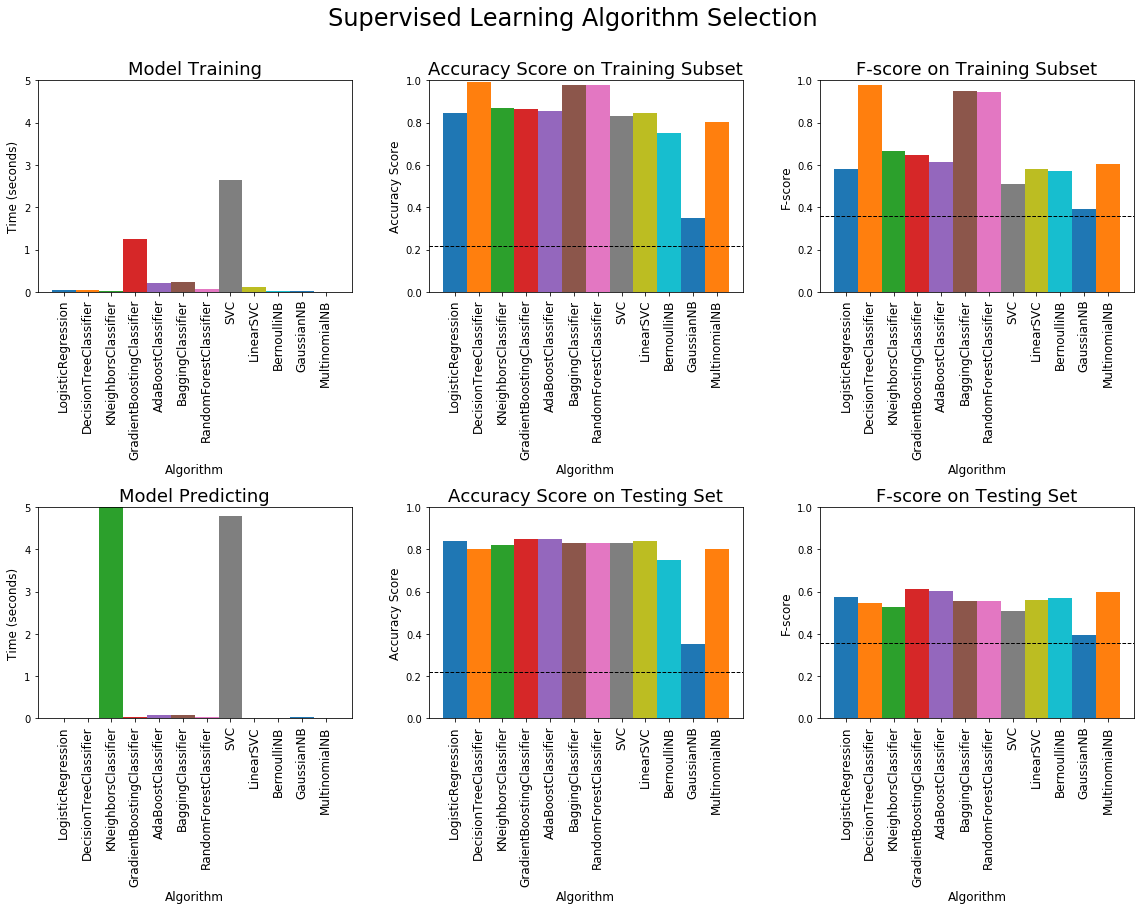

In [295]:
# Run metrics visualization for the supervised learning models chosen
vs_evaluate_models(results, accuracy, fscore)

----
# 6. GridSearch Model Optimization  

#### 6.1 Fine tune the model parameters using `GridSearchCV` and a `scorer` function 

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take a long time to run.

In [313]:
# Import libraries
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the choosen classifier
clf = GradientBoostingClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1,0.2,0.3], 'max_depth':[5]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(score_func = f1_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(best_clf)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


#### 6.2 Compare the default (unoptimized) and optimized model test results

In [314]:
default_predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
# Shows as percent 
def percentage(val, digits=2):
    val *= 10 ** (digits + 2)
    return '{1:.{0}f}%'.format(digits, np.round(val) / 10 ** digits)

print("\n")
print("Unoptimized model:")
print("Accuracy score on testing data: {:s}".format(percentage(accuracy_score(y_test, default_predictions))))
print("F-score on testing data: {:s}".format(percentage(fbeta_score(y_test, default_predictions, beta = 1))))
print("\nOptimized model:")
print("Final accuracy score on the testing data: {:s}".format(percentage(accuracy_score(y_test, best_predictions))))
print("Final F-score on the testing data: {:s}".format(percentage(fbeta_score(y_test, best_predictions, beta = 1))))



Unoptimized model:
Accuracy score on testing data: 85.96%
F-score on testing data: 62.73%

Optimized model:
Final accuracy score on the testing data: 86.26%
Final F-score on the testing data: 65.27%


----
# 7. Final Model Evaluation

----
# 8. Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. 

**Note:** Must choose a scikit-learn classifier (e.g., adaboost, random forests, descision trees) that has a `feature_importance_` attribute function that ranks the importance of features

#### 8.1 Compute feature importances for the optimized if available, otherwise train and compute using an appropriete learner 

In [315]:
# Extract the feature importances from the previously optimized learner using .feature_importances_ if available 
importances_best_clf = best_clf.feature_importances_

**Alternatively:**

In [316]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.tree import DecisionTreeClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model = DecisionTreeClassifier().fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

#### 8.2 Visualize feature importances

In [318]:
def vs_feature_importance(importances, X_train, y_train):   
    
    # select 10 most features and their weights 
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # create the figure
    fig = pl.figure(figsize = (10,10))
    pl.title("Normalized Weights for 10 Most Predictive Features", fontsize = 12, weight='bold')
    pl.bar(np.arange(10), values, width = 0.6, align="center", color = 'blue', \
          label = "Feature Weight")
    pl.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = 'green', \
          label = "Cumulative Feature Weight")
    
    # add x feature labels rotated 90 degrees
    pl.xticks(np.arange(10), columns,  rotation=90, fontsize = 12)
    pl.yticks(fontsize = 12)
    
    pl.ylabel("Weights", fontsize = 12, weight='bold')
    pl.xlabel("Features", fontsize = 12, weight='bold')
    
    pl.legend(loc = 'upper left', fontsize = 12)
    pl.tight_layout()
    pl.show()  

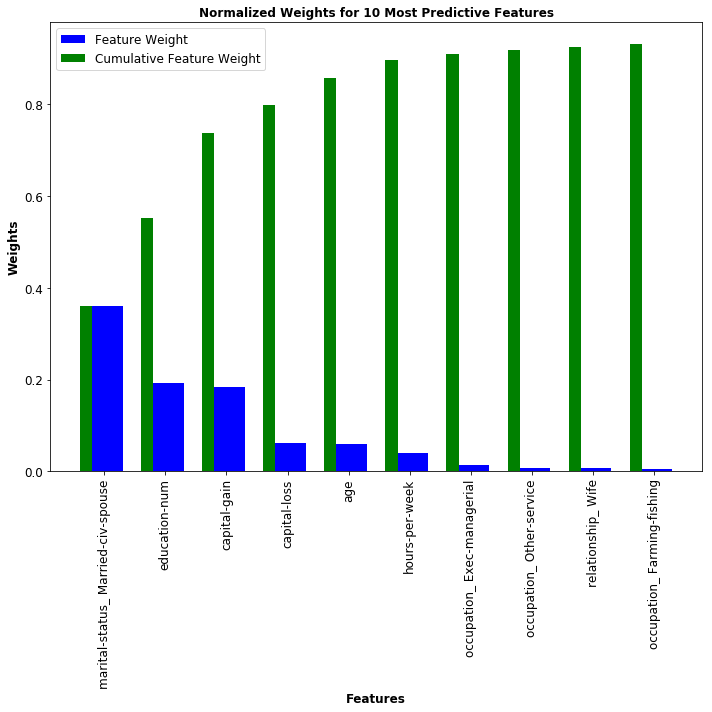

In [319]:
vs_feature_importance(importances_best_clf, X_train, y_train)

----
# 9. Dimensionality reduction  

#### 9.1 Test model performance when trained on reduced set of top (10) features   

In [320]:
# Import the function for cloning a model
from sklearn.base import clone

# Reduce the feature space to the top 10 only 
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:10]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:10]]]

# Train on the "best" GridSearchCV optimized model parameters determined above
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions with the reduced set of training features 
reduced_predictions = clf.predict(X_test_reduced)

# Shows as percent 
def percentage(val, digits=2):
    val *= 10 ** (digits + 2)
    return '{1:.{0}f}%'.format(digits, np.round(val) / 10 ** digits)

# Report scores from the final model using both versions of data
print("\n")
print("Model trainined on the FULL set of features:")
print("Accuracy on testing data: {:s}".format(percentage(accuracy_score(y_test, best_predictions))))
print("F-score on testing data: {:s}".format(percentage(fbeta_score(y_test, best_predictions, beta = 1))))
print("\nModel trained on the REDUCED set of features:")
print("Accuracy on testing data: {:s}".format(percentage(accuracy_score(y_test, reduced_predictions))))
print("F-score on testing data: {:s}".format(percentage(fbeta_score(y_test, reduced_predictions, beta = 1))))



Model trainined on the FULL set of features:
Accuracy on testing data: 86.26%
F-score on testing data: 65.27%

Model trained on the REDUCED set of features:
Accuracy on testing data: 86.03%
F-score on testing data: 63.80%
